In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload 2

In [2]:
pre_LTD2 = pd.read_pickle('/data/ana_pre_2Hz_reci')
pre_LTD50 = pd.read_pickle('/data/ana_pre_50Hz_reci')
pre_LTD50_uni = pd.read_pickle('/data/ana_pre_50Hz_uni')

In [3]:
pre_LTD2

,Before,After,File name,elimi
107,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017071401,30
108,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017071902,35
109,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017071903,45
110,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017071903,30
111,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017080401,40
113,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017072102,25


In [4]:
pre_LTD50

,Before,After,File name,elimi
14,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016091201,60
15,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'rs...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016100201,40
16,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016100303,60
17,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'rs': [...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016100304,55
18,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017021302,35
19,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017053101,60


In [5]:
pre_LTD50_uni

,Before,After,File name,elimi
9,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016081002,27
10,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016081703,40
11,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016081002,28
12,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'rs': [...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016092903,17
13,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'rs': [...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2016101201,50
20,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017051501,22


/src/Patch_ana/Patch_ana/patch_pip.py:471: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


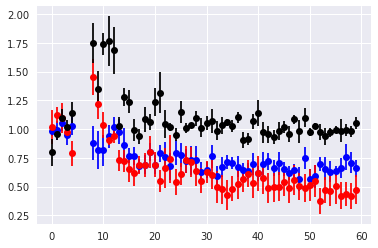

In [7]:
ave_ptl_resp = np.ones((len(pre_LTD2), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2 = patch_pip.samp_ave(pre_LTD2, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(pre_LTD50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50 = patch_pip.samp_ave(pre_LTD50, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

ave_ptl_resp = np.ones((len(pre_LTD50_uni), 60))*np.nan
ave_ptl_mean_50_uni,ave_ptl_ste_50_uni = patch_pip.samp_ave(pre_LTD50_uni, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50_uni)), y=ave_ptl_mean_50_uni, yerr=ave_ptl_ste_50_uni, fmt='ko')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


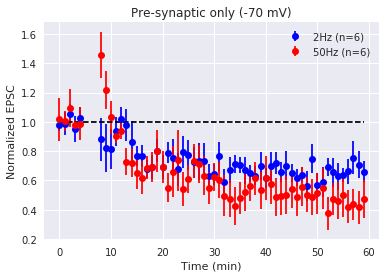

In [8]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(pre_LTD2)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(pre_LTD50)))

plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Pre-synaptic only (-70 mV)')

[0, 60, 0.2, 2]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


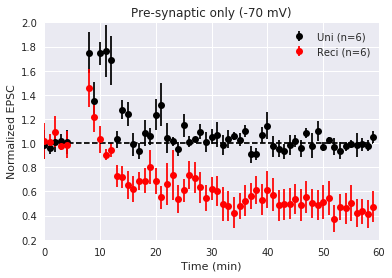

In [10]:
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50_uni, ave_ptl_ste_50_uni
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ko', label='Uni (n={a})'.format(a=len(pre_LTD50_uni)))
plt.plot(np.ones((60))*1, 'k--')

ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='ro', label='Reci (n={a})'.format(a=len(pre_LTD50)))

plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Pre-synaptic only (-70 mV)')
plt.axis([0,60,0.2,2])